# Part 2 - Analytics : Health Insurance

## 1. Attribute Information
- dataset used: health_insurance.csv <br>
- age: Age of policy holder <br>
- sex: gender of policy holder (female=0, male=1) <br>
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg /  m^2 ) using the ratio of height to weight, ideally 18.5 to 25 <br>
- steps: average walking steps per day of policy holder <br>
- children: number of children / dependents of policy holder
- smoker: smoking state of policyholder (non-smoker=0, smoker=1 ) <br>
- region: The residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) <br>
- charges: Individual medical costs billed by hospital <br>
- Insuranceclaim: claimed any insurance before (yes=1, no=0)


## 2. Importing the libraries

In [1]:
# loading necessary libraries
import numpy as np 
import pandas as pd # data analysis/manipulation
import matplotlib.pyplot as plt # display graph

## 3. Loading the data

In [2]:
data = pd.read_csv('health_insurance.csv') # reading the csv file
data.head() # review fisrt 5 rows of data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92,1
1,18,1,33.770,3008,1,0,2,1725.55,1
2,28,1,33.000,3009,3,0,2,4449.46,0
3,33,1,22.705,10009,0,0,1,21984.47,0
4,32,1,28.880,8010,0,0,1,3866.86,1


## 4. Exploratory Data Analysis
This is to help us understand the data we are working on. For example, the shape and data types of the data, as well as conducting data cleaning if necessary.

### 4.1 Shape

In [3]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')

Shape of the data: (1338, 9)
There are 1338 rows in the data.


We have 1338 rows (1338 records) and 9 columns of data.

### 4.2 Data Types

In [4]:
data.info() # date types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [5]:
data.columns # individual columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

Qualitative Data (Categorical): sex, children, smoker, region, insuranceclaim <br>
Quantitative Data (Numerical): age, bmi, steps, charges 

### 4.3 Data Cleaning

In [6]:
# check if the dataframe contains any missing or null values
data.isnull().any() 

age               False
sex               False
bmi               False
steps             False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

In [7]:
# gender: changing values 
# 1 = male, 0 = female
data['sex'].replace(0, 'female',inplace=True)
data['sex'].replace(1, 'male',inplace=True)
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,3009,0,1,3,16884.92,1
1,18,male,33.770,3008,1,0,2,1725.55,1
2,28,male,33.000,3009,3,0,2,4449.46,0
3,33,male,22.705,10009,0,0,1,21984.47,0
4,32,male,28.880,8010,0,0,1,3866.86,1


In [8]:
# region: changing values
# (yes=1, no=0)
data['region'].replace(0, 'northeast',inplace=True)
data['region'].replace(1, 'northwest',inplace=True)
data['region'].replace(2, 'southeast',inplace=True)
data['region'].replace(3, 'southwest',inplace=True)
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,3009,0,1,southwest,16884.92,1
1,18,male,33.770,3008,1,0,southeast,1725.55,1
2,28,male,33.000,3009,3,0,southeast,4449.46,0
3,33,male,22.705,10009,0,0,northwest,21984.47,0
4,32,male,28.880,8010,0,0,northwest,3866.86,1


In [9]:
# Insuranceclaim: changing values
# yes=1, no=0
data['insuranceclaim'].replace(0, 'no',inplace=True)
data['insuranceclaim'].replace(1, 'yes',inplace=True)
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,3009,0,1,southwest,16884.92,yes
1,18,male,33.770,3008,1,0,southeast,1725.55,yes
2,28,male,33.000,3009,3,0,southeast,4449.46,no
3,33,male,22.705,10009,0,0,northwest,21984.47,no
4,32,male,28.880,8010,0,0,northwest,3866.86,yes


In [10]:
# smoker: changing values
# non-smoker=0, smoker=1
data['smoker'].replace(0, 'non-smoker',inplace=True)
data['smoker'].replace(1, 'smoker',inplace=True)
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,female,27.900,3009,0,smoker,southwest,16884.92,yes
1,18,male,33.770,3008,1,non-smoker,southeast,1725.55,yes
2,28,male,33.000,3009,3,non-smoker,southeast,4449.46,no
3,33,male,22.705,10009,0,non-smoker,northwest,21984.47,no
4,32,male,28.880,8010,0,non-smoker,northwest,3866.86,yes


### 4.4. Summary and Distribution of numerical attributes:
This is to help us get an overview of the important statistics of the numerical data. These includes: age, bmi, charges and steps


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.00,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.40,34.69375,53.13
steps,1338.0,5328.623318,2453.643236,3000.00,3008.00000,4007.00,8004.00000,10010.00
children,1338.0,1.094918,1.205493,0.00,0.00000,1.00,2.00000,5.00
charges,1338.0,13270.422414,12110.011240,1121.87,4740.28750,9382.03,16639.91500,63770.43


In [12]:
# create a function that shows the summary for Quantitative Data (Numerical)
def summary(x):
    # min, median, max
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')
    
    fig = plt.figure(figsize=(16, 10)) # figure size
    
    # distribution plot
    plt.subplot(221)
    ax = data[x].plot.hist(bins=12, alpha=0.5, color = 'r')
    plt.title(f'{x.capitalize()} Histogram Distribution')  
    plt.xlabel(x)
    
    # density plot
    plt.subplot(222)
    ax2 = data[x].plot.kde()
    plt.title(f'{x.capitalize()} Density Distribution')  
    plt.xlabel(x)
    
    
    # box plot
    plt.subplot(223)
    ax3 = data[x].plot.box()
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.show()
    
    # outliers 
    IQR = Q3 - Q1 # Interquartile range
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')  


#### 4.4.1 Age

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


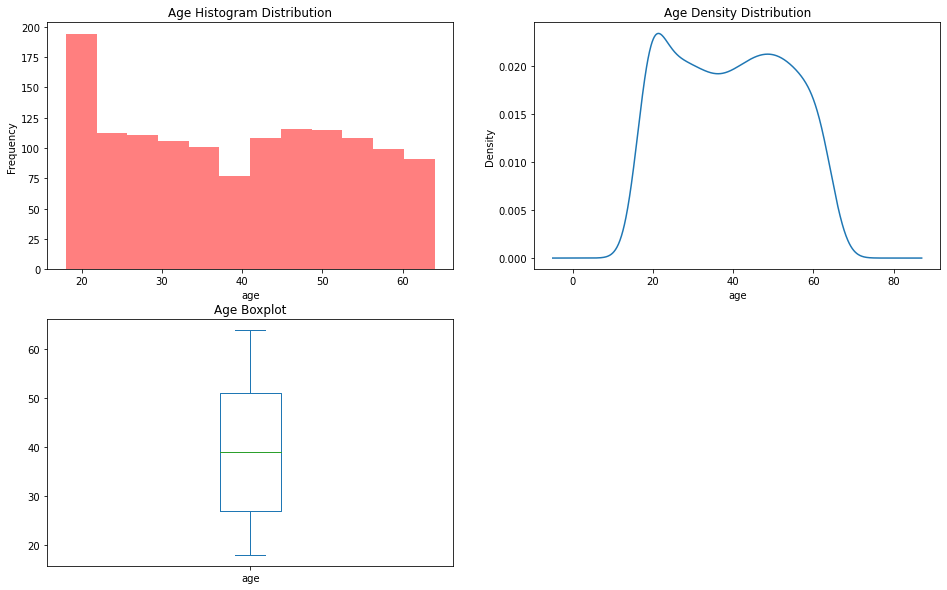

Mean Age = 39.20702541106129
Total number of outliers in age distribution: 0.


In [13]:
summary('age') # summary for age

Obeservation for age: <br>
- Uniform Distribution
- Mean of 39.2 and Median of 39.0
- Lowest age being 18 and highest being 64
- No outlier values

In [14]:
# How many of the policyholder are within the range of:

# 1. 18 to 39 - Young Adults
df = data[data['age'] <= 39]
print(f'Policy holder age 18 to 39 (Young Adults): {len(df)}.')

# 2. 40 to 59 - Middle-aged Adults
df = data[(data['age'] <= 59) & (data['age'] >= 40)]
print(f'Policy holder age 40 to 59 (Middle-aged Adults): {len(df)}.')

# 3. 60 to 64 - Old Adults
df = data[(data['age'] <= 64) & (data['age'] >= 60)]
print(f'Policy holder age 60 to 64 (Old Adults):{len(df)}.')

Policy holder age 18 to 39 (Young Adults): 674.
Policy holder age 40 to 59 (Middle-aged Adults): 550.
Policy holder age 60 to 64 (Old Adults):114.


Obeservation for age:

- There are more young adults policy holders with a total of 674
- Followed by middle-aged adults policy holders with a total of 550
- Lastly, old adults policy holders with a total of 114

#### 4.4.2 BMI

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


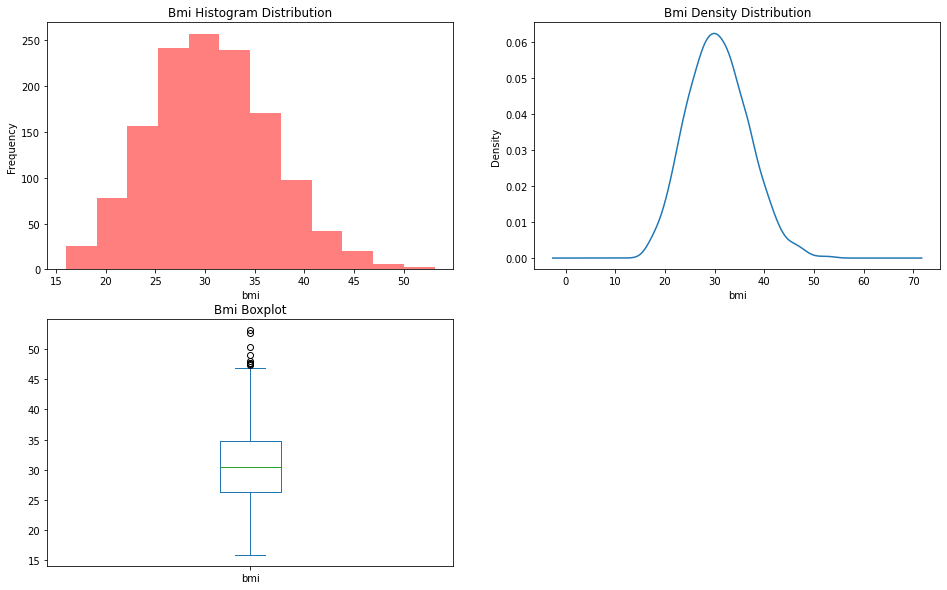

Mean Bmi = 30.663396860986538
Total number of outliers in bmi distribution: 9.


In [15]:
summary('bmi') # summary for BMI

Obeservation for BMI:

- Normal Distribution
- Mean of 30.66 and Median of 30.4
- 9 outliers, moslty on the higher end
- Lowest BMI is 15.96 & highest BMI is 53.13

In [16]:
# Identify the person with the highest bmi
df = data[data['bmi'] == data['bmi'].max()]
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1317,18,male,53.13,3005,0,non-smoker,southeast,1163.46,yes


In [17]:
# Identify the person with the lowest bmi
df = data[data['bmi'] == data['bmi'].min()]
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
172,18,male,15.96,10007,0,non-smoker,northeast,1694.8,yes


Policy holder with healthy BMI: 229.
  *17.12 % of policy holders are healthyweight.
Policy holder with underweight BMI: 69.
  *5.16 % of policy holders are underweight.
Policy holder with overweight BMI: 1060.
  *79.22 % of policy holders are overweight.


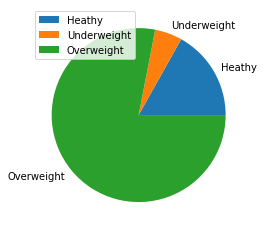

In [18]:
# How many of the policyholder are within the range of:
weight = []
labels = ["Heathy", "Underweight", "Overweight"]

# healthy bmi range (18.5 to 24.9)
df = data[(data['bmi'] <= 24.9) & (data['age'] >= 18.5)]
print(f'Policy holder with healthy BMI: {len(df)}.')
print("  *{:.2f}".format((len(df)/len(data)*100)), "% of policy holders are healthyweight.")
weight.append(len(df))

# underweight (< 18.5)
df = data[data['age'] < 18.5]
print(f'Policy holder with underweight BMI: {len(df)}.')
print("  *{:.2f}".format((len(df)/len(data)*100)), "% of policy holders are underweight.")
weight.append(len(df))

# overweight (> 24.9)
df = data[data['age'] > 24.9]
print(f'Policy holder with overweight BMI: {len(df)}.')
print("  *{:.2f}".format((len(df)/len(data)*100)), "% of policy holders are overweight.")
weight.append(len(df))

y = np.array(weight)
          
plt.pie(y, labels = labels)
plt.legend()
plt.show()     

Obeservation for BMI:

- Majority of the policy holders are overweight (79.22%)
- 5.16 % of policy holders are underweight.
- 17.12 % of policy holders are healthyweight.

#### 4.4.3 Charges

5 Point Summary of Charges Attribute:
Charges(min) : 1121.87
Q1                    : 4740.2875
Q2(Median)            : 9382.029999999999
Q3                    : 16639.915
Charges(max) : 63770.43


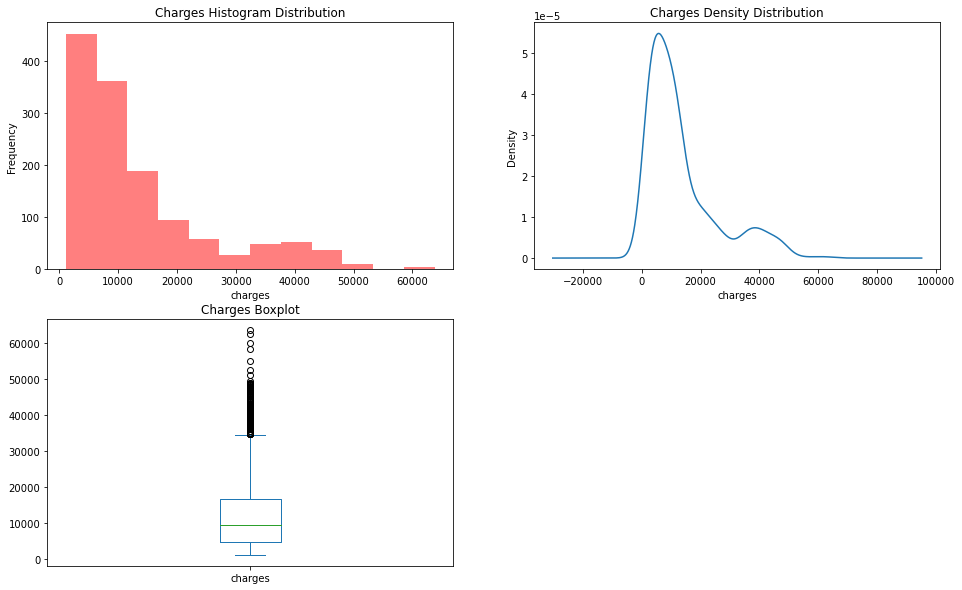

Mean Charges = 13270.422414050803
Total number of outliers in charges distribution: 139.


In [19]:
summary('charges') # summary for Charge

In [20]:
# Identify the person who paid the highest charges
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
543,54,female,47.41,4010,0,smoker,southeast,63770.43,yes


In [21]:
# Identify the oldest person, and compare their charges with the rest
print("mean for oldest people: \n" , data[data['age'] == data['age'].max()].mean() , "\n")
print("median for oldest people: \n" , data[data['age'] == data['age'].max()].median())

mean for oldest people: 
 age            64.000000
bmi            32.976136
steps        4005.136364
children        0.772727
charges     23275.530909
dtype: float64 

median for oldest people: 
 age            64.000
bmi            33.840
steps        3009.000
children        0.000
charges     15528.755
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2868103625.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("mean for oldest people: \n" , data[data['age'] == data['age'].max()].mean() , "\n")
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2868103625.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("median for oldest people: \n" , data[data['age'] == data['age'].max()].median())


In [22]:
# Identify the youngest person, and compare their charges with the rest
print("mean for youngest people:\n" , data[data['age'] == data['age'].min()].mean() , "\n")
print("median for youngest people:\n" , data[data['age'] == data['age'].min()].median())

mean for youngest people:
 age           18.000000
bmi           31.326159
steps       5149.724638
children       0.449275
charges     7086.217971
dtype: float64 

median for youngest people:
 age           18.00
bmi           31.35
steps       4003.00
children       0.00
charges     2198.19
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_16940\1421294715.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("mean for youngest people:\n" , data[data['age'] == data['age'].min()].mean() , "\n")
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\1421294715.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("median for youngest people:\n" , data[data['age'] == data['age'].min()].median())


In [23]:
# Identify the highest bmi, and compare his charges with the rest
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1317,18,male,53.13,3005,0,non-smoker,southeast,1163.46,yes


Obeservation for Charges:

- Distribution is heavily skewed to the right.
- Mean of 13270.42 and Median of 9382.03
- 139 outliers, moslty on the higher end
- Lowest charges is 1121.87 & highest charges is 63770.43
- The person with the highest charge is a 54 y/o women with a overweight bmi
- The person with the highest bmi is aged 18 and he is paying less charges as compared to the median and mean
- The oldest people paid significantly more charges as compared to the younger people with a mean and median of (23275.53, 15528.76) for the oldest people and (7086.22, 2198.19) for the youngest.

#### 4.4.4 Steps

5 Point Summary of Steps Attribute:
Steps(min) : 3000
Q1                    : 3008.0
Q2(Median)            : 4007.0
Q3                    : 8004.0
Steps(max) : 10010


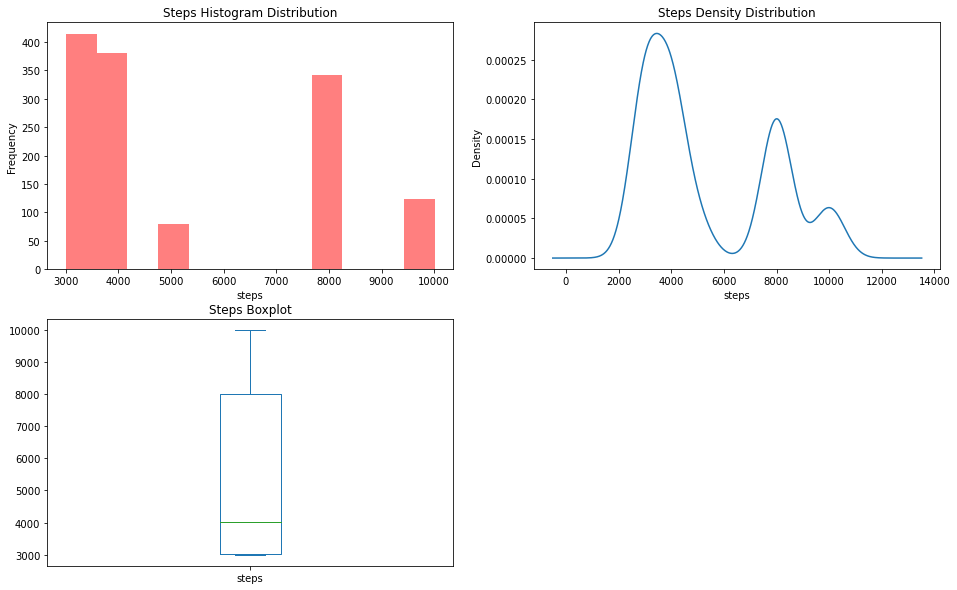

Mean Steps = 5328.62331838565
Total number of outliers in steps distribution: 0.


In [24]:
summary('steps') # summary for Steps

In [25]:
# Identify the person with the highest steps, and compare their BMI with the rest
print("mean for highest steps:\n" , data[data['steps'] == data['steps'].max()].mean() , "\n")
print("median for highest steps:\n" , data[data['steps'] == data['steps'].max()].median())

mean for highest steps:
 age            26.40
bmi            22.12
steps       10010.00
children        1.00
charges      7504.42
dtype: float64 

median for highest steps:
 age            28.00
bmi            23.32
steps       10010.00
children        1.00
charges      3732.63
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2251610423.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("mean for highest steps:\n" , data[data['steps'] == data['steps'].max()].mean() , "\n")
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2251610423.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("median for highest steps:\n" , data[data['steps'] == data['steps'].max()].median())


In [26]:
# Identify the person with the least steps, and compare their BMI with the rest
print("mean for least steps:\n" , data[data['steps'] == data['steps'].min()].mean() , "\n")
print("median for least steps:\n" , data[data['steps'] == data['steps'].min()].median())

mean for least steps:
 age            37.071429
bmi            34.522381
steps        3000.000000
children        1.166667
charges     14559.202619
dtype: float64 

median for least steps:
 age            36.0000
bmi            34.1525
steps        3000.0000
children        1.0000
charges     10845.4250
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_16940\1427804171.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("mean for least steps:\n" , data[data['steps'] == data['steps'].min()].mean() , "\n")
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\1427804171.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("median for least steps:\n" , data[data['steps'] == data['steps'].min()].median())


Obeservation for Steps:

- Distribution is heavily skewed to the right
- Mean of 5329 and Median of 5328
- 0 outliers
- Lowest steps is 3008 & highest steps is 10010
- The insured who took the highest steps have a significantly less bmi as compared to those who took the least steps, with a mean and median of (22.12, 23.32) for the insured with highest steps and (34.52, 34.15) for the least steps
- In addition, the insured who took the highest steps also paid a significantly less charges as compared to those who took the least steps, with a mean and median of (7504.42, 3732.63) for the insured with highest steps and (14559.20, 10845.42) for the least steps

### 4.5. Summary and Distribution of categorical attributes:
This is to help us get an overview of the important statistics of the numerical data. These includes: sex, smoker, region, children, and insurance claim.


In [27]:
# Bar Chart (Values)
def bar_chart(x):
    fig = plt.figure(figsize=(16, 12)) # figure size
    
    # Bar Graph
    plt.subplot(221)
    ax = data[x].value_counts().plot(kind='bar',rot=0, color=['blue', 'green', 'cyan', 'black', 'red'])
    ax.bar_label(ax.containers[0])
    plt.title(f'{x.capitalize()} Bar Chart')  
    plt.xlabel(x)
    plt.ylabel("count")
    
    plt.show() 

In [28]:
# Pie Chart (Percentage)
def pie_chart(x, explode):
    fig = plt.figure(figsize=(16, 12)) # figure size
    
    plt.subplot(221)
    
    ax = data[x].value_counts().plot(kind='pie', autopct='%.1f%%', explode=explode)
    plt.title(f'{x.capitalize()} Pie Chart')  

    plt.show() 

#### 4.5.1 Sex

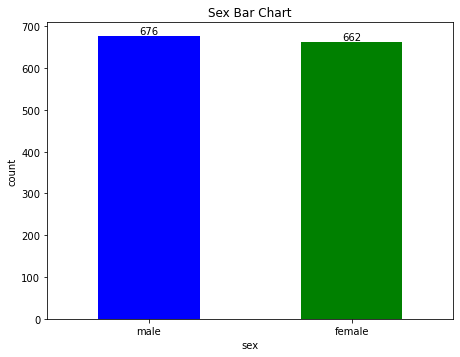

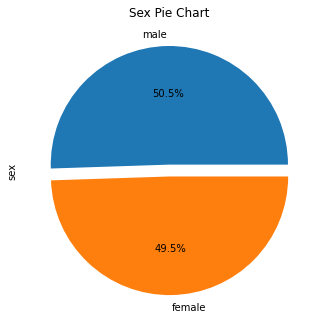

In [29]:
bar_chart("sex")

# Define the ratio of gap of each fragment in a tuple
explode = (0.05,0.05)

pie_chart("sex", explode)

Obeservation for Age:
- The genders are evenly distributed with 676 males (50.5%) and 662 females (49.5%)


#### 4.5.1 Smoker

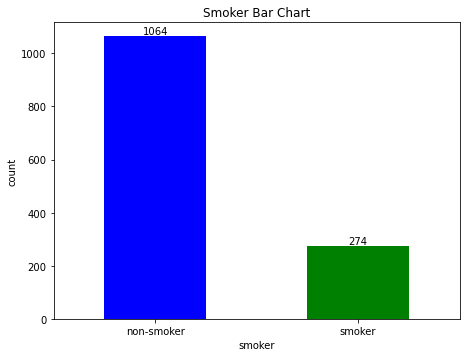

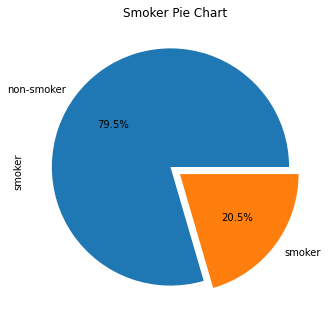

In [30]:
bar_chart("smoker")

# Define the ratio of gap of each fragment in a tuple
explode = (0.05,0.05)

pie_chart("smoker", explode)

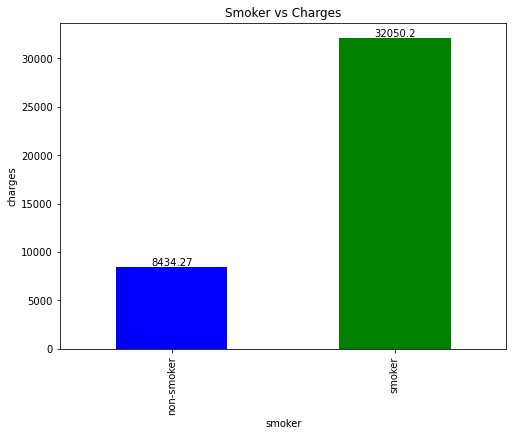

In [31]:
# Are charges more expensive for smoker as compared to non-smoker?
df = data['charges'].groupby(data['smoker']).mean()

fig = plt.figure(figsize=(8, 6)) # figure size
ax = df.plot.bar(color=['blue', 'green'])
ax.bar_label(ax.containers[0])
plt.title("Smoker vs Charges")  
plt.ylabel("charges")
    
plt.show() 

Obeservation for Smoker:
- There are about 4 times more non-smokers (1064) as compared to smokers (274)
- The average charges for smokers are significantly higher as compared to non-smokers

#### 4.5.1 Region

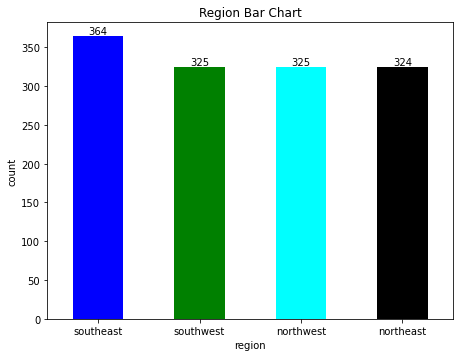

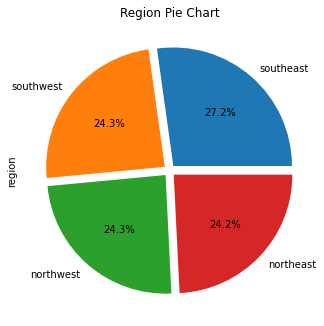

In [32]:
bar_chart("region")

# Define the ratio of gap of each fragment in a tuple
explode = (0.05,0.05,0.05,0.05)

pie_chart("region", explode)

In [33]:
Obeservation for Region:
- All the 4 regions are evenly distributed in the dataset

SyntaxError: invalid syntax (1362492385.py, line 1)

#### 4.5.1 Children

In [ ]:
bar_chart("children")

# Define the ratio of gap of each fragment in a tuple
explode = (0.05,0.05,0.05,0.05,0.10,0.10)

pie_chart("children", explode)

Obeservation for Chidlren:
- About half (42.9%/574) of the dataset have 0 children

#### 4.5.1 Insurance Claim

# 5. Correlation

In [ ]:
# EXTRA (REQUIRES SEABORN)
import seaborn as sns # data visualisation
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

Obeservation for Correlation:

- Charges show a weak positive correlation with Age and BMI
- Charges show a strong positive correlation with smoking person
- Charges, Smoking, Children, Steps and BMI show a weak positive correlation with insurance claim
- Steps show a strong negative correlation with BMI